In [19]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sns
import glob


In [20]:
file = "C://Users/16823/Desktop/Research Papers/Retinal_Datasets/iChallenge-AMD-Training400/Non-AMD/" 

img_file = list(glob.glob1(file, "*.jpg"))
img = []
for i in img_file:
    img.append(i)

data = []
for i in img:
    image_path = file + i
    gray=Image.open(image_path)
    gray_resiz = gray.resize((256, 256))
    arr_gray = np.array(gray_resiz)
    data.append(arr_gray)


In [21]:
d = np.array(data)


In [22]:
d.shape

(311, 256, 256, 3)

In [23]:
file1 = "C://Users/16823/Desktop/Research Papers/Retinal_Datasets/iChallenge-AMD-Training400/AMD/" 

img_file1 = list(glob.glob1(file1, "*.jpg"))
img1 = []
for i in img_file1:
    img1.append(i)

data1 = []
for i in img1:
    image_path1 = file1 + i
    gray1=Image.open(image_path1)
    gray_resiz1 = gray1.resize((256, 256))
    arr_gray1 = np.array(gray_resiz1)
    data1.append(arr_gray1)


In [24]:
d1 = np.array(data1)


In [25]:
d1.shape

(89, 256, 256, 3)

In [26]:
df = np.concatenate((d, d1), axis = 0)
df.shape

(400, 256, 256, 3)

In [27]:
d_label = [0]*311
d1_label = [1]*89

In [28]:
y = np.concatenate([d_label, d1_label])


In [29]:
import keras
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from keras.utils import np_utils

In [30]:
# # #Spliting the data in 80:20 training to testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 0)

# x_train = pd.concat([df.iloc[:135, :100], df.iloc[168:303,:100]], axis = 0, ignore_index = True).values
# x_test =pd.concat([df.iloc[135:168, :100], df.iloc[303:,:100]], axis = 0, ignore_index = True).values
# y_train = pd.concat([df.iloc[:135, 100], df.iloc[168:303,100]], axis = 0, ignore_index = True).values
# y_test = pd.concat([df.iloc[135:168, 100], df.iloc[303:, 100]], axis = 0, ignore_index = True).values


In [31]:
import keras
y_train = keras.utils.np_utils.to_categorical(y_train,2)
y_test = keras.utils.np_utils.to_categorical(y_test,2)


In [32]:
y_train.shape

(320, 2)

In [33]:
# Models 
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

from tensorflow.keras.applications import EfficientNetB0
model_cnn = tf.keras.models.Sequential([
    EfficientNetB0(input_shape=(256,256,3), include_top=False),
])
for layer in model_cnn.layers:
  layer.trainable = False

model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.4))
model_cnn.add(Dense(2, activation='sigmoid'))

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 8, 8, 1280)       4049571   
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          737344    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                36928     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

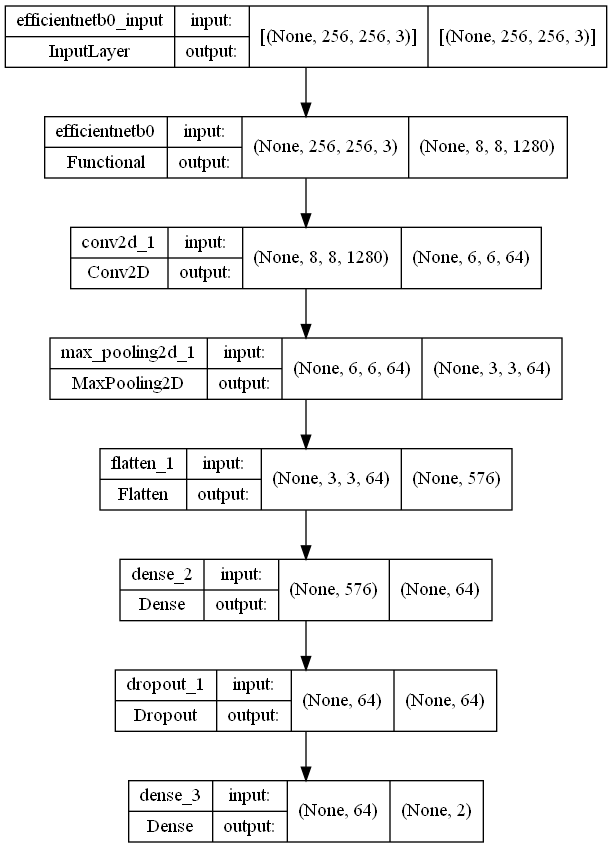

In [34]:
from tensorflow.keras.utils import plot_model

#model = Model(inputs=[mlp.input, model_cnn.input], outputs=x)

plot_model(model_cnn, "multi_input_and_output_model.png", show_shapes=True)

In [35]:

loss = keras.losses.BinaryCrossentropy()
model_cnn.compile(loss= loss, optimizer= 'adam', metrics=['accuracy','Precision','Recall','AUC'])
# train the model
print("[INFO] training model...")

h = model_cnn.fit(x=x_train, y=y_train, epochs=50, batch_size=32)

[INFO] training model...
Epoch 1/50
10/10 [==============================] - 40s 2s/step - loss: 1.0058 - accuracy: 0.7406 - precision: 0.6889 - recall: 0.7750 - auc: 0.7466
Epoch 2/50
10/10 [==============================] - 23s 2s/step - loss: 0.4175 - accuracy: 0.8031 - precision: 0.8121 - recall: 0.7969 - auc: 0.8896
Epoch 3/50
10/10 [==============================] - 24s 2s/step - loss: 0.3515 - accuracy: 0.8406 - precision: 0.8476 - recall: 0.8344 - auc: 0.9247
Epoch 4/50
10/10 [==============================] - 24s 2s/step - loss: 0.3041 - accuracy: 0.8781 - precision: 0.8700 - recall: 0.8781 - auc: 0.9447
Epoch 5/50
10/10 [==============================] - 23s 2s/step - loss: 0.2471 - accuracy: 0.9031 - precision: 0.9105 - recall: 0.8906 - auc: 0.9666
Epoch 6/50
10/10 [==============================] - 23s 2s/step - loss: 0.2323 - accuracy: 0.9125 - precision: 0.8981 - recall: 0.9094 - auc: 0.9676
Epoch 7/50
10/10 [==============================] - 23s 2s/step - loss: 0.2033 - 

In [36]:
score = model_cnn.evaluate(x_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])


3/3 [==============================] - 33s 3s/step - loss: 0.5350 - accuracy: 0.8875 - precision: 0.8875 - recall: 0.8875 - auc: 0.9430
loss= 0.5349643230438232
accuracy= 0.887499988079071
